# <a href=https://tech.kakao.com/2022/07/13/2022-coding-test-summer-internship/>Official Solution</a>
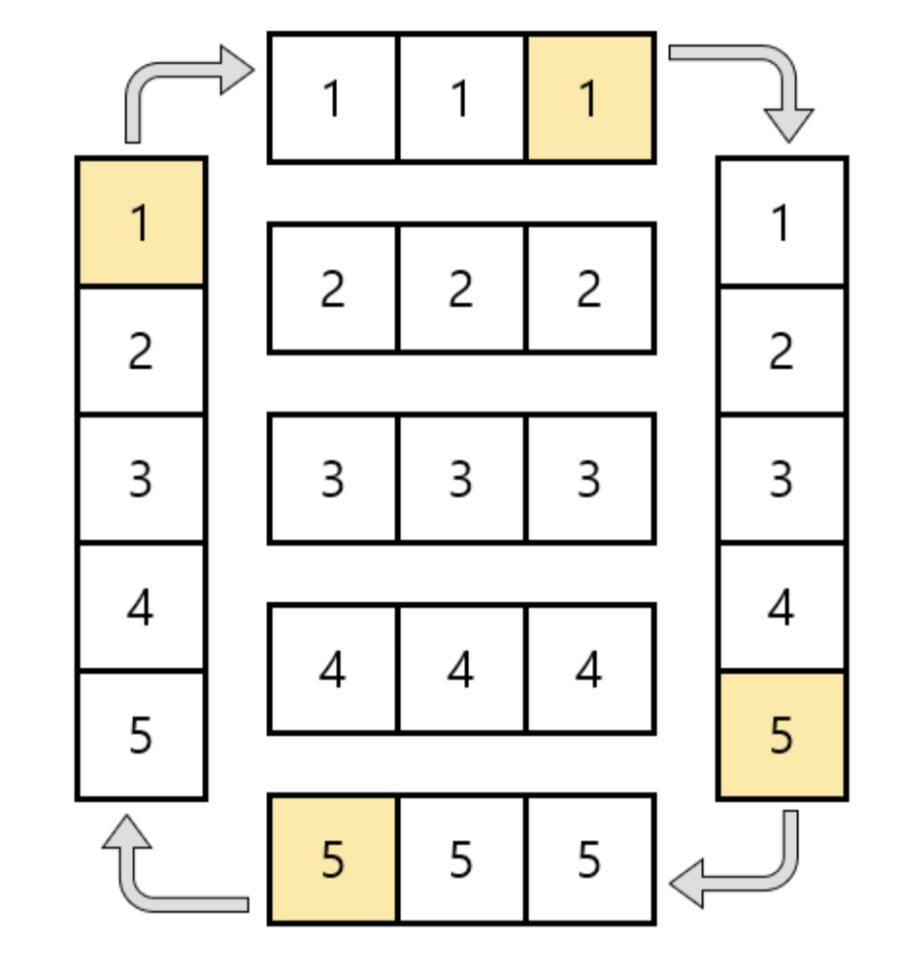
# ! frist_row, rows, last_row 분리해서 생각하는 아이디어

In [1]:
from collections import deque

row_len, col_len = 0, 0

def shift_row(rows, first_col, last_col):
    first_col.appendleft(first_col.pop())
    rows.appendleft(rows.pop())
    last_col.appendleft(last_col.pop())
    return rows, first_col, last_col

def rotate(rows, first_col, last_col):
    global row_len, col_len

    rows[0].appendleft(first_col.popleft())
    last_col.appendleft(rows[0].pop())
    rows[row_len - 1].append(last_col.pop())
    first_col.append(rows[row_len - 1].popleft())

    return rows, first_col, last_col

def solution(rc, operations):
    rc = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    rc = deque(rc)

    row_len = len(rc)
    col_len = len(rc[0])

    rows = deque(deque(row[1: -1]) for row in list(rc))
    first_col = deque(rc[row][0] for row in range(row_len))
    last_col = deque(rc[row][col_len - 1] for row in range(row_len))

    for operation in operations:
        if operation == "ShiftRow":
            rows, first_col, last_col = shift_row(rows, first_col, last_col)
        if operation == "Rotate":
            rows, first_col, last_col = rotate(rows, first_col, last_col)

    answer = deque()
    for r in range(row_len):
        new_row = deque()
        new_row.append(first_col[r])
        new_row.extend(rows[r])
        new_row.append(last_col[r])
        answer.append(list(new_row))
    return list(answer)